In [1]:
import pandas as pd

# Load the uploaded Excel file
file_path = '女子Q2指标_带势头评分.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,比赛ID,已进行时间,盘数,局数,球员1赢得盘数,球员2赢得盘数,球员1赢得局数,球员2赢得局数,此分中的回合数（包括发球,1波动,...,球员1连胜盘数,球员2连胜盘数,球员1连胜局数,球员2连胜局数,1获胜盘分差,2获胜盘分差,1获胜局分差,2获胜局分差,选手1势头评分,选手2势头评分
0,2023-wimbledon-2503,00:02:15,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.244642,0.367414
1,2023-wimbledon-2503,00:04:05,1,2,0,0,0,1,7,4,...,0,0,0,1,0,0,-1,1,0.367584,0.285803
2,2023-wimbledon-2503,00:06:34,1,3,0,0,1,1,5,1,...,0,0,1,0,0,0,0,0,0.291909,0.367414
3,2023-wimbledon-2503,00:10:14,1,4,0,0,1,2,2,0,...,0,0,0,1,0,0,-1,1,0.181671,0.431800
4,2023-wimbledon-2503,00:13:04,1,5,0,0,1,3,2,4,...,0,0,0,2,0,0,-2,2,0.345946,0.359291


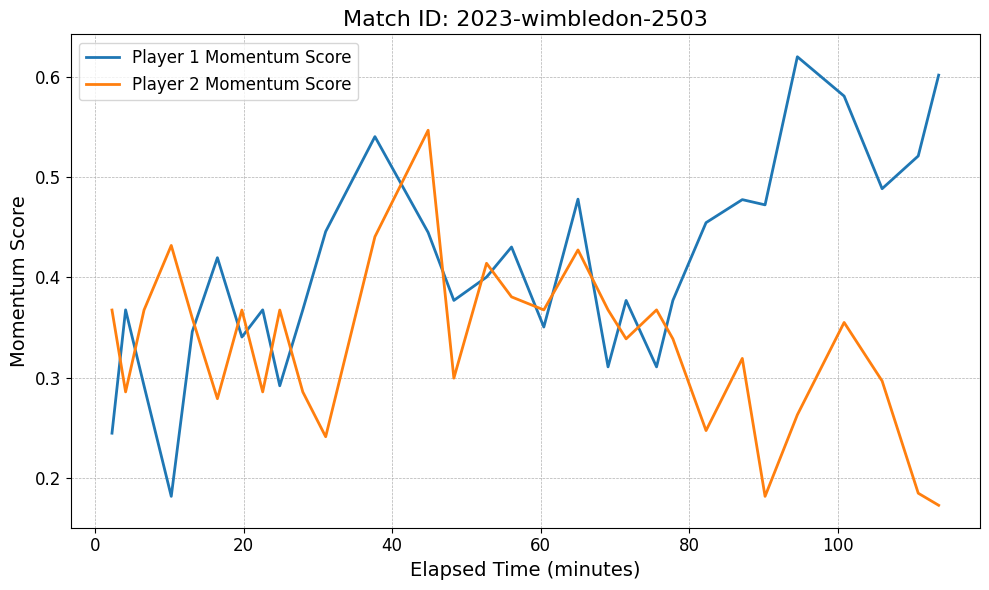

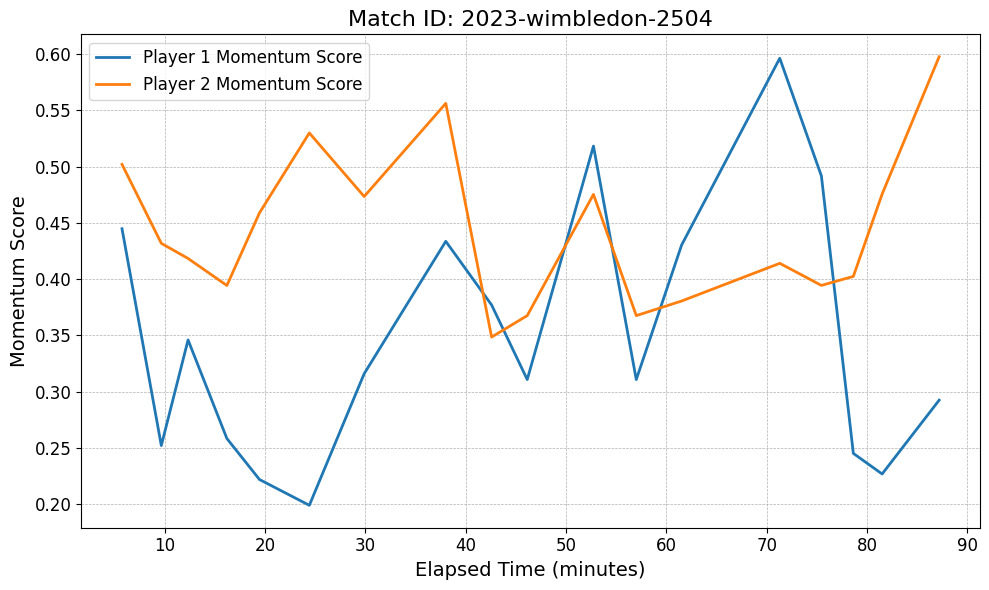

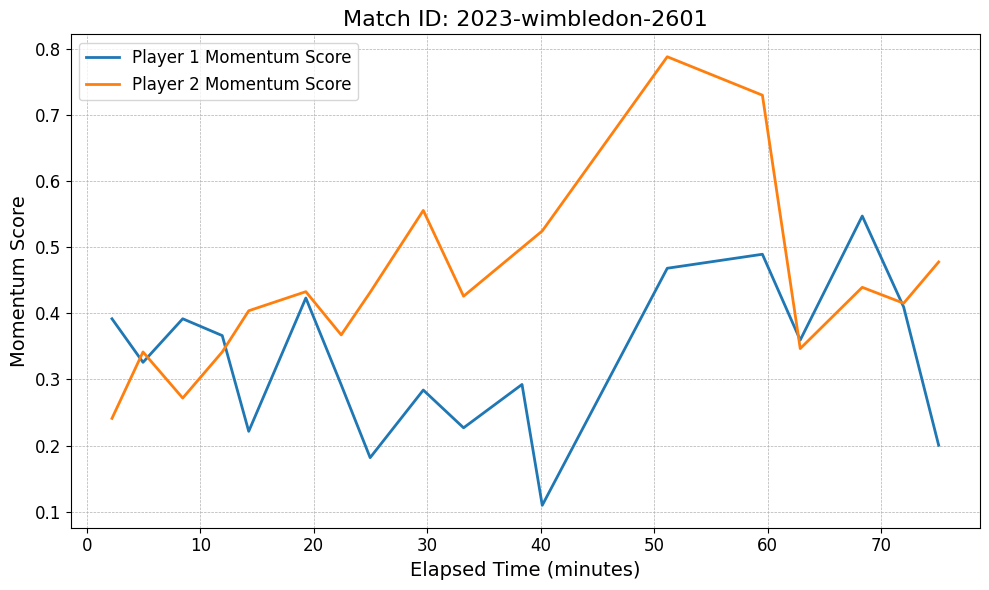

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '女子Q2指标_带势头评分.xlsx'
data = pd.read_excel(file_path)

# Convert '已进行时间' to a time delta for easier handling
data['已进行时间'] = pd.to_timedelta(data['已进行时间'])
data['比赛ID'] = data['比赛ID'].astype(str)

# Identify the unique match IDs and select data for the first three matches
unique_matches = data['比赛ID'].unique()

colors = {'Player 1': '#1f77b4', 'Player 2': '#ff7f0e'} # Define colors for the plots

for match_id in unique_matches[:3]:
    match_df = data[data['比赛ID'] == match_id].copy()
    match_df['Cumulative Minutes'] = match_df['已进行时间'].dt.total_seconds() / 60
    
    # Create a new figure for each match
    plt.figure(figsize=(10, 6))
    plt.plot(match_df['Cumulative Minutes'], match_df['选手1势头评分'], label='Player 1 Momentum Score', color=colors['Player 1'], linewidth=2)
    plt.plot(match_df['Cumulative Minutes'], match_df['选手2势头评分'], label='Player 2 Momentum Score', color=colors['Player 2'], linewidth=2)
    
    # Formatting the plot
    plt.title(f'Match ID: {match_id}', fontsize=16)
    plt.xlabel('Elapsed Time (minutes)', fontsize=14)
    plt.ylabel('Momentum Score', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tick_params(labelsize=12)
    plt.tight_layout()
    plt.show()
